# Flowers Recognition
### By : Muhammad Alfarizi Tazkia
### Dataset Link : https://www.kaggle.com/alxmamaev/flowers-recognition



## Importing Library

In [1]:
import tensorflow as tf
import zipfile
import shutil
import os
import matplotlib.pyplot as plt

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

from tensorflow.keras.optimizers import Adam

## File Configuration

### Extracting Directory

In [4]:
# show directory
print(os.listdir())

['.ipynb_checkpoints', 'archive-dataset', 'flowers-recognition.ipynb', '.git']


In [5]:
print(os.listdir('archive-dataset'))

['archive(3).zip']


In [4]:
dataset_zip = 'archive-dataset/archive(3).zip'
os.mkdir('dataset')
dataset_dir = 'dataset/'

scanning_zip_file = zipfile.ZipFile(dataset_zip, 'r')
scanning_zip_file.extractall(dataset_dir)
scanning_zip_file.close()

print('Successfully extracting dataset!')

Successfully extracting dataset!


In [6]:
print(os.listdir())
# print(os.listdir(os.path.join(dataset_dir, 'flowers')))

['dataset', '.ipynb_checkpoints', 'archive-dataset', 'flowers-recognition.ipynb', '.gitignore', '.git']


### Define Directory Name

In [32]:
os.rename(os.path.join(dataset_dir, 'flowers'), os.path.join(dataset_dir, 'train'))
print(os.listdir(dataset_dir))

['train']


In [33]:
os.mkdir(os.path.join(dataset_dir, 'val'))

In [29]:
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
print(os.listdir(dataset_dir))

['train', 'val']


### Split Training and Validation Data

In [30]:
split_portion = 0.8

In [36]:
for category in os.listdir(train_dir):
    current_dir = os.path.join(train_dir, category)
    dir_length = len(os.listdir(current_dir))
    counter = 0
    max_training = split_portion * dir_length
    
    os.mkdir(os.path.join(val_dir, category))
    target_dir = os.path.join(val_dir, category)
    
    print("{} before splitting : {} files".format(category, dir_length))
    
    for file in os.listdir(current_dir):
        src = os.path.join(current_dir, file)
        target = os.path.join(target_dir, file)
        
        counter += 1
        
        if counter >= max_training:
            shutil.move(src, target)
            
    print("{} after splitting : {} files".format(category, len(os.listdir(current_dir))))
    
    print()

rose before splitting : 784 files
rose after splitting : 627 files

tulip before splitting : 984 files
tulip after splitting : 787 files

daisy before splitting : 764 files
daisy after splitting : 611 files

dandelion before splitting : 1052 files
dandelion after splitting : 841 files

sunflower before splitting : 733 files
sunflower after splitting : 586 files



## Preprocessing Image

In [31]:
train_rule = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    shear_range = 0.2,
    rotation_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    fill_mode = 'nearest'
)

val_rule = ImageDataGenerator(
    rescale = 1./255
)

In [32]:
train_generator = train_rule.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'categorical',
    shuffle = True
)

val_generator = val_rule.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'categorical',
)

Found 3452 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


## Building Model

In [33]:
model = Sequential([
    Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(256, activation = 'relu'),
    Dense(5, activation = 'softmax')
])

model.summary()

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['acc']
)

history = model.fit(
    train_generator,
    epochs = 10,
    validation_data = val_generator
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)            

### Save Model

In [34]:
saved_model_path = './model.h5'
model.save(saved_model_path)

## Draw Graph

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

### Training vs Validation Accuracy

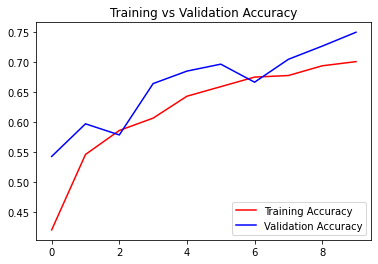

In [36]:
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend(loc=4)
plt.show()

### Training vs Validation Loss

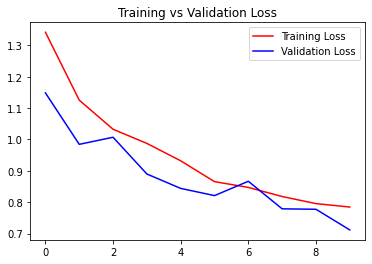

In [37]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.legend(loc=0)
plt.title('Training vs Validation Loss')
plt.show()